#### Question 1
Use a real-world dataset (i.e. relational, text, image, video, voice files), prepare the dataset for modelling, consider one categorical variable in the dataset, and apply the classification task. To do so:  

* Provide the functional form of the predictive model for each algorithm.
* Train each model using different ratios of the trainset and visualize the performance of models using accuracy (y -axis) in terms of different ratio of trainsets (x-axis). Elaborate on the insights.
* Apply ensemble methods (bagging, boosting, stacking) on the base models, evaluate the performance of each ensemble technique in 100 Monte Carlo runs and visualize the performance of models using Boxplot.
* Select the best classifier and elaborate on its advantages and limitations.

Data Set Information : 

* URL : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [64]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#### Imports

In [65]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier, BaggingRegressor, AdaBoostRegressor, StackingRegressor, RandomForestRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from statistics import variance
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import time


#### Data Observation

The Heart Disease data set  is all numerical so it does not need any encoding to be applied.

In [66]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Data Integrety
The Data set has no null/NaN value so there is no need for data preparation.

In [67]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### Data Observation
The total number of columns are 14 and Rows are 303

In [68]:
len(df.columns), len(df)

(14, 303)

In [69]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Data Preparation

Splitting the data into `target` and `feature` varables

In [70]:
# Feature varables
X = df.drop("output", axis=1)

# Target Varaible
y = df["output"]

#### Data Balance

Checking if the target variable data is balanced using feature varables

In [71]:
# Number of target varable types
target_count = y.value_counts()
print(target_count)


1    165
0    138
Name: output, dtype: int64


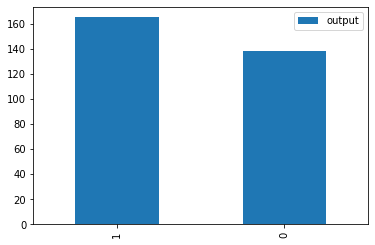

In [72]:
plot_values = pd.DataFrame(target_count)
plot_values.plot.bar();

#### Model selection

We will run the set of models through 100 Monte Carlo runs and check accuracy to determine which of the models are best suited for our data set.

In [73]:
clfs = {
    "RF" : RandomForestClassifier(n_estimators=10, random_state=42),
    "DT" : DecisionTreeClassifier(),
    "SVC" : SVC(probability=True, kernel='linear'),
}

#### Model testing impelementaion

Using the method below we can get the accuracy for all the above models, ensamble methods are also implemented to check through the runs. 

In [74]:
# Method to Run Iterations

# Data Collection for each run of the method

# Accuracy of each model 
clf_acc = {}

# CV Scores for Ensamble methods
clf_cv_scores = {}

# Store of trained models to use to predict if needed
clf_store = {}

# Test values used to evaluate each models to use for plotting and further evaluation
clf_y_test = {}

# Predicted value for each model to be used for further plotting and evaluation
clf_y_preds = {}

boost_clf_accuracy = {}
bag_clf_accuracy = {}
stack_clf_cv = {}

# Method to run all the models provided on the data set
def run_clfs(X, y , split_size, mc_run_limit, ens_bg_clf = False, ens_bo_clf = False, ens_st_clf = False, n_est = 1, cv_val = None, base_learners = None, final_estimator = None, one_estimator = False, estimator_str = ''):
    
    # Running though all models/Classifiers 
    for key in clfs:
        # For 100 Monte Carlo runs
        for i in range(mc_run_limit):

                # Selecting each classifiers
                clf = clfs[key]

                # Preparing data by slitting it into training and testing data
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split_size)

                # If bagging 
                if ens_bg_clf:
                    if one_estimator and key == estimator_str:
                        model = BaggingClassifier(base_estimator = clfs[estimator_str], n_estimators = n_est, max_samples = 0.8, max_features= 0.8)
                        dt = model.fit(X_train,y_train)
                    else:
                        model = BaggingClassifier(base_estimator = clf, n_estimators = n_est, max_samples = 0.8, max_features= 0.8)
                        dt = model.fit(X_train,y_train)
                
                # If boosting
                elif ens_bo_clf:
                    if one_estimator and key == estimator_str:
                        model = AdaBoostClassifier(base_estimator = clfs[estimator_str], n_estimators = n_est)
                        dt = model.fit(X_train,y_train)
                    else:
                        model = AdaBoostClassifier(base_estimator = clf, n_estimators = n_est)
                        dt = model.fit(X_train,y_train)

                # If stacking
                elif ens_st_clf:
                    model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv = cv_val)
                    dt = model.fit(X_train,y_train)

                # Or normal models
                else:    
                    dt = clf.fit(X_train,y_train)

                # Predited values on test set
                y_preds = dt.predict(X_test) 

                # actual values
                actual = y_test

                # Predicted value
                predicted = y_preds

                # Accuracy Score
                accuracy = accuracy_score(actual, predicted)

                # If ensamble is used the CV scores are required for BoxPlot
                if (ens_bg_clf or ens_bo_clf or ens_st_clf):
                    cv_scores = cross_val_score(dt, X, y, scoring='accuracy', cv = cv_val, error_score='raise')
                else:
                    cv_scores = {}
        
        # Filling data 
        clf_acc[key] = accuracy
        
        if(ens_bg_clf):
            stack_clf_cv["Bag"] = cv_scores
        
        if(ens_bo_clf):
            stack_clf_cv["Boost"] = cv_scores
        
        if(ens_st_clf):
            stack_clf_cv["Stack"] = cv_scores

        clf_cv_scores[key] = cv_scores
        clf_store[key] = dt
        clf_y_test[key] = y_test
        clf_y_preds[key] = y_preds

### Part 1
 Running the Models for varying value of test set, in this case 20% and 50 %

#### Monte carlo runs with 20% Test data

In [75]:
# Training size 20%, MC runs 100

run_clfs(X, y, 0.2, 100)

#### Check the accuracy of the models

In [76]:
pd.DataFrame([clf_acc])

,RF,DT,SVC
0,0.740741,0.72428,0.806584


#### Conclusion for 20 percent data as test.

As observed above Random forrest performs best with 20 percent data as test on 100 MC runs,
The confustion matrix below will give some clear visual idea.


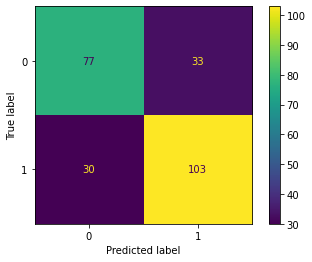

In [77]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test["RF"], y_pred= clf_y_preds["RF"]);

#### Summary using Classification report for 20% test data

In [78]:
print(classification_report(clf_y_test["RF"], clf_y_preds["RF"]))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       110
           1       0.76      0.77      0.77       133

    accuracy                           0.74       243
   macro avg       0.74      0.74      0.74       243
weighted avg       0.74      0.74      0.74       243



#### Monte carlo runs with 50% Test data

In [79]:
# Training size 50%, MC runs 100
run_clfs(X, y, 0.5, 100)

#### Check the accuracy of the models

In [80]:
pd.DataFrame([clf_acc])

,RF,DT,SVC
0,0.769737,0.75,0.789474


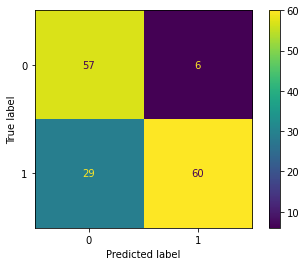

In [81]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test["RF"], y_pred= clf_y_preds["RF"]);

#### Summary using Classification report for 50% test data

In [82]:
print(classification_report(clf_y_test["RF"], clf_y_preds["RF"]))

              precision    recall  f1-score   support

           0       0.66      0.90      0.77        63
           1       0.91      0.67      0.77        89

    accuracy                           0.77       152
   macro avg       0.79      0.79      0.77       152
weighted avg       0.81      0.77      0.77       152



### Part 2 - Ensamble methods

Using Ensamble methods run 100 monte carlo runs to determine which ensamble works best with which model

#### Using Bagging Ensamble method with the classifiers

Using bagging with the existing classifers provides with less varance in data, it also prevents over fitting.

In [83]:
# Ensamble Bagging for 100 MC runs on all models
run_clfs(X, y, 0.2, 100, ens_bg_clf=True)

#### Results with Bagging Approch

In [84]:
pd.DataFrame([clf_acc])

,RF,DT,SVC
0,0.765432,0.716049,0.757202


#### Training the model with Random Forest as it has the best score

In [85]:
# Ensamble Bagging for 100 MC runs on Random Forest models
run_clfs(X, y, 0.2, 100, ens_bg_clf=True, one_estimator = True, estimator_str="RF" )

#### Using Boosting Ensamble method with the classifiers

Using Boosting we can create a strong classifer from multiple weak classiers 

In [86]:
# Ensamble Boosting for 100 MC runs
run_clfs(X, y, 0.2, 100, ens_bo_clf= True)

#### Results of the models with Boosting approch

In [87]:
pd.DataFrame([clf_acc])

,RF,DT,SVC
0,0.777778,0.674897,0.736626


#### Training the model with Random Forest as it has the highest accuracy

In [88]:
# Ensamble Boosting for 100 MC runs
run_clfs(X, y, 0.2, 100, ens_bo_clf = True, one_estimator = True, estimator_str="RF" )

#### Using Stacking methods to train the models

Stacking can use the ability of well trained models to improve the performance, it works in paralell.

In [89]:
base_learners = [
                 ('cf_1', LogisticRegression()),
                 ('cf_2', DecisionTreeClassifier()),             
                 ('cf_3', SVC())             
                ]
final_estimator = RandomForestClassifier(n_estimators=10, random_state=42)
warnings.filterwarnings('ignore')

### Use stacking to imporve the performance

In [90]:
run_clfs(X, y, 0.2, 100, ens_st_clf = True, cv_val = 5, base_learners = base_learners, final_estimator = final_estimator)

#### Output of stacking

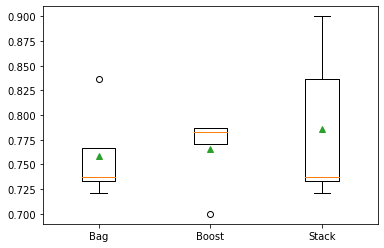

In [91]:
ens_acc = {}
ens_acc.update(bag_clf_accuracy)
ens_acc.update(boost_clf_accuracy)
ens_acc.update(stack_clf_cv)
plt.boxplot(ens_acc.values(), labels = ens_acc.keys(), showmeans = True);

#### Concusion 

As per the above observation Bagging with RandomForestClassifer is the best model is best, even without without bagging  the accuracy of random forest is best of all other models used.
Hence we can conclude that
* Bagging with RandomForestClassifer gives the best output.
* As per classification report and Confusion Matrix, when ensambles are not used, RandomForestClassifer with test set as 20% of entire data set.

### Question 2
* Consider a continuous attribute in your dataset as the target variable, perform
 regression analysis using different ensemble methods, visualize and interpret the results. 


In [92]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [93]:
# Data Prep
X = df.drop(["age"], axis=1)
y = df["age"]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [95]:
# Models to run

models = {
    "LR" : LinearRegression(),
    "SVR_Linear" : SVR(kernel="linear"),
    "SVR_rbf" : SVR(kernel="rbf"),
    "DTR" : DecisionTreeRegressor(),
    "RFR" : RandomForestRegressor(),
    "GBR" : GradientBoostingRegressor()
}

In [96]:
rmse_values_bag = {}
for key in models:
    model = BaggingRegressor(base_estimator=models[key], n_estimators=50, max_samples=0.8, max_features=0.8)
    model.fit(X_train, y_train)
    predicted_values = model.predict(X_test)
    mse = mean_squared_error(predicted_values, y_test)
    rmse = np.sqrt(mse)
    rmse_values_bag[key] = rmse

In [97]:
pd.DataFrame([rmse_values_bag])

,LR,SVR_Linear,SVR_rbf,DTR,RFR,GBR
0,6.278618,6.165301,7.343972,6.990282,6.457318,6.440198


In [98]:
rmse_values_boo = {}
for key in models:
    model = AdaBoostRegressor(base_estimator=models[key], n_estimators=50)
    model.fit(X_train, y_train)
    predicted_values = model.predict(X_test)
    mse = mean_squared_error(predicted_values, y_test)
    rmse = np.sqrt(mse)
    rmse_values_boo[key] = rmse

In [99]:
pd.DataFrame([rmse_values_boo])

,LR,SVR_Linear,SVR_rbf,DTR,RFR,GBR
0,5.967584,6.367734,7.199067,7.980509,7.12846,7.17469


In [100]:
base_learners = [
                 ('cf_1', LinearRegression()),
                 ('cf_2', DecisionTreeRegressor()),             
                 ('cf_3', GradientBoostingRegressor()),             
                 ('cf_4', SVR(kernel="linear")),             
                 ('cf_5', SVR(kernel="rbf"))           
                ]
final_estimator = RandomForestRegressor(n_estimators=10, random_state=42)

In [101]:
model = StackingRegressor(estimators=base_learners, final_estimator=final_estimator)
model.fit(X_train, y_train)
predicted_values = model.predict(X_test)
mse = mean_squared_error(predicted_values, y_test)
rmse = np.sqrt(mse)

In [102]:
pd.DataFrame([rmse])

,0
0,7.439626


In [103]:
x_bar = np.mean(y)
vari = variance(y)
std_dev = np.std(y)
Low = x_bar-2*std_dev
Up = x_bar+2*std_dev
outliers_l = []
for j in y:
    if j > Up or j < Low:
        outliers_l.append(j)
outlier_count = len(outliers_l)
output_count  = len(y)
percentage_outliers = ((len(outliers_l)/len(y))*100)
pd.DataFrame([[outlier_count, output_count, percentage_outliers]], columns=["Outliers Count", "Total Count", "Percentange"])

,Outliers Count,Total Count,Percentange
0,10,303,3.30033


The Percentage of out liers are very less , hence we can ignore the outliers

As `RandomForestRegressior` is best performing in bagging, bosting and stacking, we can use the random forest regressor for predictions, but as this data if more for classifcation problems its difficult to get accurate predictions over it.

### Question 3

Use dataset available on http://users.stat.ufl.edu/~winner/data/nfl2008_fga.csv

* Use LDA to classify the dataset into few classes so that at least 90% of information of dataset is explained through new classification. (Hint: model the variable “qtr” to variables “togo”, “kicker”, and “ydline”). How many LDs do you choose? Explain the reason.
* Apply PCA, and identify the important principle components involving at least 90% of dataset variation. Explain your decision strategy?  Plot principle components versus their variance.

In [104]:
nfl_df = pd.read_csv("http://users.stat.ufl.edu/~winner/data/nfl2008_fga.csv")
nfl_df.head()

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,...,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
0,20081130,IND,CLE,1,47,2,IND,CLE,4.0,11.0,...,30,0,-3,2822,0,3,2008,1,0,0
1,20081005,IND,HOU,1,54,47,IND,HOU,4.0,3.0,...,46,0,0,3287,0,0,2008,1,0,0
2,20081228,TEN,IND,1,45,20,IND,TEN,4.0,3.0,...,28,1,7,2720,7,0,2008,1,0,0
3,20081012,BAL,IND,1,45,42,IND,BAL,4.0,1.0,...,37,1,14,2742,14,0,2008,1,0,0
4,20080907,CHI,IND,1,50,56,IND,CHI,4.0,21.0,...,39,1,0,3056,0,0,2008,1,0,0


In [105]:
nfl_df["qtr"].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [106]:
nfl_df.isna().sum()

GameDate    0
AwayTeam    0
HomeTeam    0
qtr         0
min         0
sec         0
kickteam    0
def         0
down        2
togo        2
kicker      0
ydline      0
name        0
distance    0
homekick    0
kickdiff    0
timerem     0
offscore    0
defscore    0
season      0
GOOD        0
Missed      0
Blocked     0
dtype: int64

In [107]:
nfl_df = nfl_df.fillna(0)
nfl_df.isna().sum()

GameDate    0
AwayTeam    0
HomeTeam    0
qtr         0
min         0
sec         0
kickteam    0
def         0
down        0
togo        0
kicker      0
ydline      0
name        0
distance    0
homekick    0
kickdiff    0
timerem     0
offscore    0
defscore    0
season      0
GOOD        0
Missed      0
Blocked     0
dtype: int64

In [108]:
nfl_df = nfl_df.drop(["GameDate","AwayTeam","HomeTeam","kickteam","def", "name"], axis=1)

In [109]:
nfl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   qtr       1039 non-null   int64  
 1   min       1039 non-null   int64  
 2   sec       1039 non-null   int64  
 3   down      1039 non-null   float64
 4   togo      1039 non-null   float64
 5   kicker    1039 non-null   int64  
 6   ydline    1039 non-null   int64  
 7   distance  1039 non-null   int64  
 8   homekick  1039 non-null   int64  
 9   kickdiff  1039 non-null   int64  
 10  timerem   1039 non-null   int64  
 11  offscore  1039 non-null   int64  
 12  defscore  1039 non-null   int64  
 13  season    1039 non-null   int64  
 14  GOOD      1039 non-null   int64  
 15  Missed    1039 non-null   int64  
 16  Blocked   1039 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 138.1 KB


In [110]:
X = nfl_df.drop("qtr", axis=1)
y = nfl_df["qtr"]

In [111]:
clfs = {
    "DT" : DecisionTreeClassifier(),
    "LR" : LogisticRegression(),
    "GB" : GaussianNB()
}

In [112]:
accuracy_normal = {}
y_preds = {}
for key in clfs:
    for i in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)
        clf = clfs[key]
        t_clf = clf.fit(X_train, y_train)
        y_pred = t_clf.predict(X_test)
        a = accuracy_score(y_test, y_pred)
        accuracy_normal[key]= a
        y_preds[key]= y_preds
pd.DataFrame([accuracy_normal])

,DT,LR,GB
0,1.0,0.996795,0.945513


#### Using LDA

LDA Creates a linier combinations of the original features

`n_componets = 0.5 * x1 + 0.2 * x2 + 0.3 *x3`

In [113]:
lda_based_model = LinearDiscriminantAnalysis(n_components=1)
lda_X = lda_based_model.fit_transform(X, y)

In [114]:
var_ratio_lda = lda_based_model.explained_variance_ratio_
var_ratio_lda

array([0.99244456])

#### Creating a function to select n_components

In [115]:
def n_components(var_ratio_lda, des_var) -> int:
    variance = 0.0
    n_comp = 0
    for var_ratio in var_ratio_lda:
        variance = variance + var_ratio
        n_comp += 1
        if variance >= des_var:
            break
    return n_comp

In [116]:
comp = n_components(var_ratio_lda, 0.90)
comp

1

In [117]:
lda_df = pd.DataFrame(lda_X)
lda_df.columns = ['ldaOne']

In [118]:
accuracy_lda = {}
y_preds = {}
time_taken = {}
for key in clfs:
    for i in range(1000):
        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(lda_X, y, test_size = 0.3, random_state= 42)
        clf = clfs[key]
        t_clf = clf.fit(X_train, y_train)
        y_pred = t_clf.predict(X_test)
        end_time = time.time()
        a = accuracy_score(y_test, y_pred)
        accuracy_lda[key]= a
        y_preds[key]= y_preds
        time_taken[key] = np.subtract(end_time, start_time)
warnings.filterwarnings("ignore")
pd.DataFrame([accuracy_lda])

,DT,LR,GB
0,0.980769,0.971154,0.967949


As we can seeLiner Regression takes More time than other models and as we have seen above it also has lesser accuarcy than decision tree, hence we will go with DecisionTreeClassifier

In [119]:
pd.DataFrame([time_taken])

,DT,LR,GB
0,0.001008,0.032841,0.000996


PCA

In [120]:
pca_ins = PCA(n_components=1)
X_pca = pca_ins.fit_transform(X)
PCA_L = pca_ins.components_
PCA_L

array([[-1.66483606e-02, -9.23988619e-04, -6.95769246e-05,
         1.01183727e-04,  3.71613583e-04,  4.69406766e-04,
         4.75019033e-04,  1.03303163e-06,  9.21338193e-04,
        -9.99825622e-01,  6.32715643e-03,  5.40581823e-03,
         0.00000000e+00, -3.14239886e-06,  3.14239886e-06,
         2.32335195e-06]])

In [121]:
pca_df = pd.DataFrame(PCA_L)
pca_df_T =  pca_df.T
pca_df_T.columns = ["pca"]
pca_df_T.head()

,pca
0,-0.016648
1,-0.000924
2,-0.000070
3,0.000101
4,0.000372


In [122]:
pca_ins.explained_variance_, pca_ins.n_components

(array([1007908.25197757]), 1)

In [123]:
X.shape

(1039, 16)

In [124]:
df_final = np.dot(X, pca_df_T)

In [125]:
accuracy_pca = {}
y_preds = {}
time_taken = {}
for key in clfs:
    for i in range(1000):
        start_time = time.time()
        X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size = 0.3, random_state= 42)
        clf = clfs[key]
        t_clf = clf.fit(X_train, y_train)
        y_pred = t_clf.predict(X_test)
        end_time = time.time()
        a = accuracy_score(y_test, y_pred)
        accuracy_pca[key]= a
        y_preds[key]= y_preds
        time_taken[key] = np.subtract(end_time, start_time)
warnings.filterwarnings("ignore")
pd.DataFrame([accuracy_pca])

,DT,LR,GB
0,1.0,0.996795,0.983974


#### Conclusion

#### Accuracy Normal 1000 MC runs

In [126]:
pd.DataFrame([accuracy_normal])

,DT,LR,GB
0,1.0,0.996795,0.945513


#### Accuracy LDA 1000 MC runs

In [127]:
pd.DataFrame([accuracy_lda])

,DT,LR,GB
0,0.980769,0.971154,0.967949


#### Accuracy PCA 1000 MC runs

In [128]:
pd.DataFrame([accuracy_pca])

,DT,LR,GB
0,1.0,0.996795,0.983974


The summray of the performance is as shown below

|     Methods  | Decision Tree | Logistic Regression | Naive Bayes |
|--------------|---------------|---------------------|-------------|
|      Normal  | 1.0           | 0.99                | 0.94        |
|      LDA     | 0.980         | 0.97                | 0.96        |
|      PCA     | 0.999         | 0.99                | 0.98        |

n_components for LDA and PCA is 1 for variance of more than 0.96. Increase in value of n_components will train the model faster but will reduce the accuracy